Compare statistics of adobe_core5 and movielens_100k dataset

In [32]:
from utils.data_importer import DataImporter
from core import DATA_CLEAN_PATH, MAIN_DIRECTORY

import os
import pandas as pd
from datetime import datetime

# from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True

import warnings
warnings.filterwarnings("ignore")

user_col = 'user'
item_col = 'item'
time_col = 'time'

dataset_ls = ['adobe_core5', 'movielens_100k', 'adobe', 'mind_small']
dataset_name_display = {
    'adobe_core5': 'KP_core5', 
    'movielens_100k': 'MovieLens_100k', 
    'adobe': 'KP', 
    'mind_small': 'MIND_small'
}

In [4]:
# summary stats
interaction = []
for dataset_name in dataset_ls:
    DI = DataImporter(dataset_name, DATA_CLEAN_PATH)
    print(f'\nDataset {dataset_name}: ')
    train = pd.read_csv(DI.train_path)[[DI.info['user'], DI.info['item'], DI.info['time']]]
    val = pd.read_csv(DI.val_path)[[DI.info['user'], DI.info['item'], DI.info['time']]]
    test = pd.read_csv(DI.test_path)[[DI.info['user'], DI.info['item'], DI.info['time']]]
    df = pd.concat([train, val, test], axis=0)
    df.columns = ['user', 'item', 'time']
    interaction.append(df)
    print(f'Number of interactions:\ntrain={train.shape[0]}\tval={val.shape[0]}\ttest={test.shape[0]}')
    n_user = len(df['user'].unique())
    n_item = len(df['item'].unique())
    print(f"Number of unique users={n_user}\nNumber of unique items={n_item}")
    print(f'Sparsity={df.shape[0]/(n_user*n_item)}')
adobe_core5, movielens_100k, adobe, mind_small = interaction


Dataset adobe_core5: 
Number of interactions:
train=56874	val=6469	test=12185
Number of unique users=10921
Number of unique items=2899
Sparsity=0.002385598550144332

Dataset movielens_100k: 
Number of interactions:
train=38763	val=914	test=1349
Number of unique users=666
Number of unique items=1362
Sparsity=0.0452280474306906

Dataset adobe: 
Number of interactions:
train=647175	val=20663	test=37306
Number of unique users=466967
Number of unique items=3175
Sparsity=0.00047560662407664106

Dataset mind_small: 
Number of interactions:
train=2250340	val=23518	test=108341
Number of unique users=92787
Number of unique items=52866
Sparsity=0.000485640002956636


# User Clicks

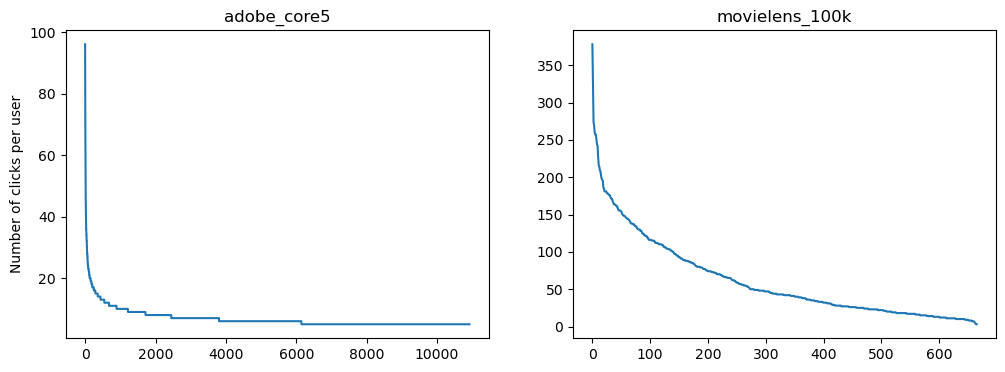

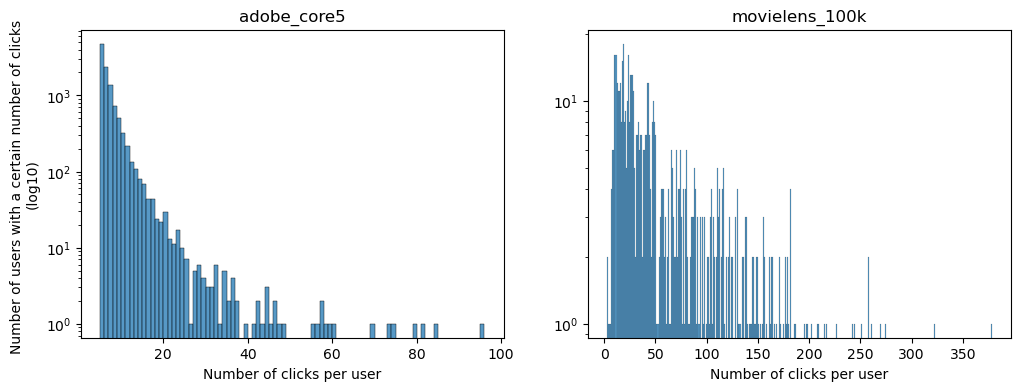

In [31]:
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 4))
for i in range(2): 
    df = interaction[i]
    ax1 = axs1[i]    # number of clicks per user
    ax2 = axs2[i]    # number of users that have a certain number of clicks (log scale)

    userClicks = df.groupby(user_col)[item_col].count().reset_index()\
                .rename(columns={item_col:"n_clicks_per_user"})\
                .sort_values('n_clicks_per_user', ascending=False)
    sns.lineplot(x=range(userClicks.shape[0]), y=userClicks['n_clicks_per_user'], ax=ax1)
    sns.histplot(data = userClicks, x = 'n_clicks_per_user', log_scale=(False, 10), binwidth=1, ax=ax2)
    ax1.title.set_text(dataset_ls[i])
    ax2.title.set_text(dataset_ls[i])
    if i==0:
        ax1.set_ylabel('Number of clicks per user')
        ax2.set_ylabel('Number of users with a certain number of clicks \n(log10)')
    else:
        ax1.set_ylabel('')
        ax2.set_ylabel('')
    ax2.set_xlabel('Number of clicks per user')
plt.show()


In [69]:
# compare users in adobe and adobe_core5

itemPop = adobe.groupby(item_col)[user_col].count().reset_index()\
    .sort_values(user_col, ascending=False).reset_index(drop=True).reset_index().drop(user_col, axis=1)\
    .rename(columns = {'index': 'popularity_rank'})
userClicks = adobe.groupby(user_col)[item_col].count().reset_index()

# for user with only one click, probability of the clicked item to be among top-20 most popular items 
user_one_click = userClicks.loc[userClicks[item_col] <= 1][user_col].tolist()  # filter users in adobe with only 1 or 2 clicks
print('Proportion of users with only one click: ', len(user_one_click)/userClicks.shape[0])
user_one_click_itemPop = adobe.loc[adobe[user_col].isin(user_one_click), [user_col, item_col]].merge(itemPop)
prop_one_click_popular = (user_one_click_itemPop['popularity_rank'] < 20).sum()/user_one_click_itemPop.shape[0]
print(prop_one_click_popular)

# overall probability of the clicked item to be among top-20 most popular items 
adobe_itemPop = adobe.merge(itemPop)
prop_adobe_click_popular = (adobe_itemPop['popularity_rank'] < 20).sum()/adobe_itemPop.shape[0]
print(prop_adobe_click_popular)

Proportion of users with only one click:  0.7089537376302822
0.35413432087428787
0.29690247665725017


# Item Clicks

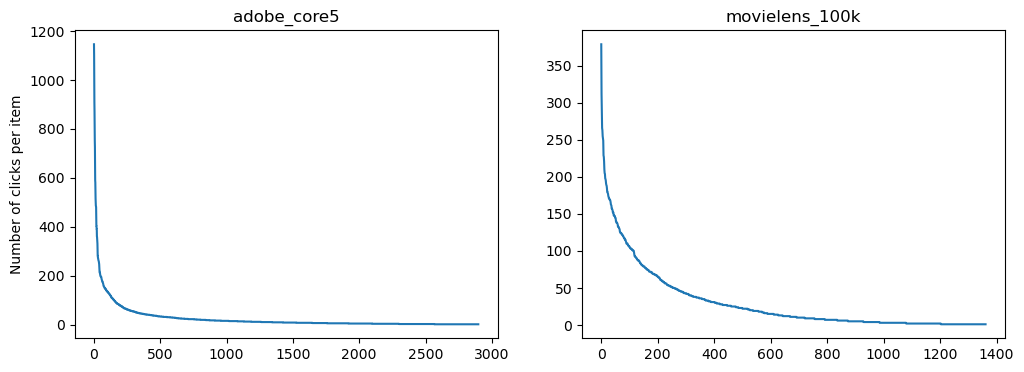

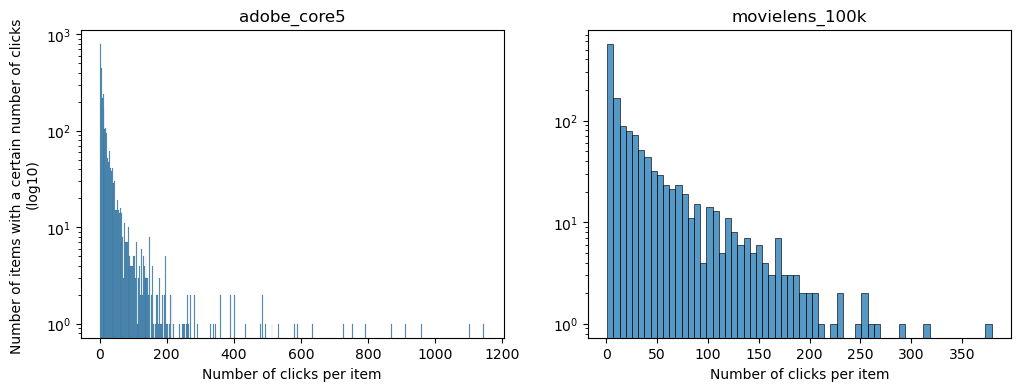

In [30]:
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 4))
for i in range(2): 
    df = interaction[i]
    ax1 = axs1[i]    # number of clicks per user
    ax2 = axs2[i]    # number of users that have a certain number of clicks (log scale)

    itemClicks = df.groupby(item_col)[user_col].count().reset_index()\
                .rename(columns={user_col:"n_clicks_per_item"})\
                .sort_values('n_clicks_per_item', ascending=False)
    sns.lineplot(x=range(itemClicks.shape[0]), y=itemClicks['n_clicks_per_item'], ax=ax1)
    sns.histplot(data = itemClicks, x = 'n_clicks_per_item', log_scale=(False, 10), ax=ax2)
    ax1.title.set_text(dataset_ls[i])
    ax2.title.set_text(dataset_ls[i])
    if i==0:
        ax1.set_ylabel('Number of clicks per item')
        ax2.set_ylabel('Number of items with a certain number of clicks \n(log10)')
    else:
        ax1.set_ylabel('')
        ax2.set_ylabel('')
    ax2.set_xlabel('Number of clicks per item')
plt.show()


# Item LifeSpan

Dataset adobe_core5: average item lifespan = 153.0545015522594
Dataset movielens_100k: average item lifespan = 123.7863436123348
Dataset adobe: average item lifespan = 190.77858267716536
Dataset mind_small: average item lifespan = 0.09851322210872773


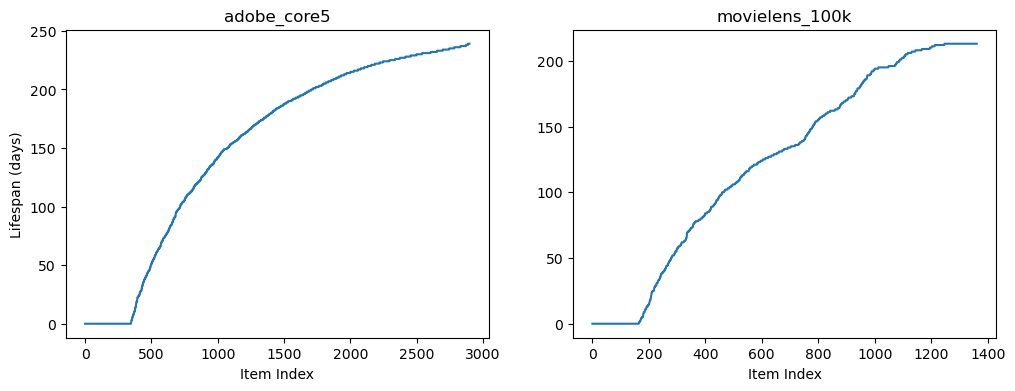

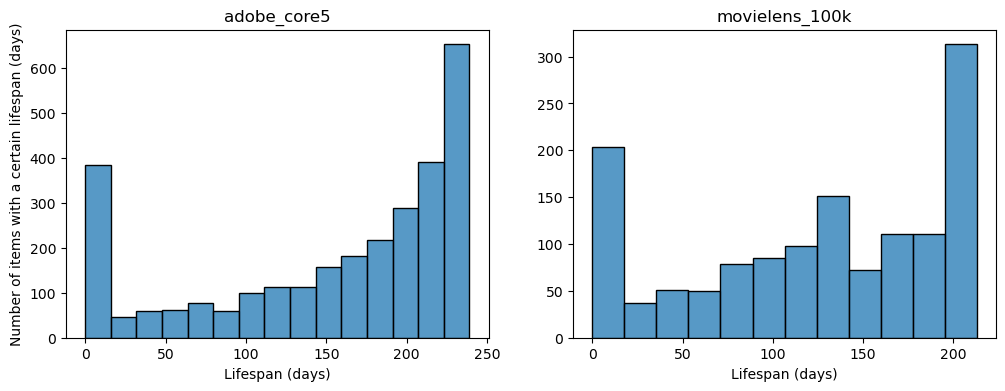

In [34]:
for i in range(4):
    df = [adobe_core5, movielens_100k, adobe, mind_small][i]
    itemLifespan = df[['item', 'time']].copy()
    if i == 1:
        # convert timestamp to datetime
        itemLifespan['time'] = itemLifespan['time'].map(lambda x: datetime.fromtimestamp(x))
    itemLifespan['time'] = pd.to_datetime(itemLifespan['time'])
    itemLifespan = itemLifespan.groupby('item')['time'].agg([min,max]).reset_index()

    lifespan = (itemLifespan['max'] - itemLifespan['min']).map(lambda x: x.days)
    print(f'Dataset {dataset_ls[i]}: average item lifespan = {lifespan.mean()}')

# plot of item lifespan distribution for adobe_core5 and movielens_100k
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 4))
for i in range(2): 
    df = interaction[i]
    ax1 = axs1[i]    # lifespan per user
    ax2 = axs2[i]    # number of items that have a certain lifespan 

    itemLifespan = df[['item', 'time']].copy()
    if i == 1:
        # convert timestamp to datetime
        itemLifespan['time'] = itemLifespan['time'].map(lambda x: datetime.fromtimestamp(x))
    itemLifespan['time'] = pd.to_datetime(itemLifespan['time'])
    itemLifespan = itemLifespan.groupby('item')['time'].agg([min,max]).reset_index()
    lifespan = (itemLifespan['max'] - itemLifespan['min']).map(lambda x: x.days)
    lifespan = lifespan.sort_values()

    sns.lineplot(x=range(lifespan.shape[0]), y=lifespan, ax=ax1)
    sns.histplot(data = lifespan, ax=ax2)
    ax1.title.set_text(dataset_ls[i])
    ax2.title.set_text(dataset_ls[i])
    if i==0:
        ax1.set_ylabel('Lifespan (days)')
        ax2.set_ylabel('Number of items with a certain lifespan (days)')
    else:
        ax1.set_ylabel('')
        ax2.set_ylabel('')
    ax1.set_xlabel('Item Index')
    ax2.set_xlabel('Lifespan (days)')
plt.show()


# Item Statistics
article length, seasonal click trend

In [77]:
# article length
page = pd.read_csv(os.path.join(MAIN_DIRECTORY, 'data_raw', 'adobe', 'page_meta.csv')).fillna('')
page_title_length = page['pagename_extracted'].map(lambda x: len(x.split(" ")))
page_body_length = page['body_t'].map(lambda x: len(x.split(" ")))

print("Avg. page title length: ", page_title_length.mean())
print("Avg. page body length: ", page_body_length.mean())

Avg. page title length:  4.012816505157862
Avg. page body length:  587.6402000625195


## Seasonal Trend

In [11]:
# seasonal trend: use the original KP dataset
adobe_raw = pd.read_csv(os.path.join(MAIN_DIRECTORY, 'data_raw', 'adobe', 'healthwise_Adobe_joined.csv'))[['guid', 'pagename_extracted', 'date_time']]
adobe_raw.columns=['user_id', 'item_id', 'date_time']

In [16]:
def create_page_time_matrix(df, user_col, item_col, time_col):

    df[time_col] = pd.to_datetime(df[time_col])
    df['date'] = df[time_col].dt.date
    item_time = df.groupby([item_col, 'date'])[user_col].count().reset_index()\
                       .rename(columns={user_col:'count'})\
                       .pivot(index=item_col, columns='date').fillna(0)
    # normalize the number of clicks -> proportion of clicks on that day
    item_time_prop = item_time/item_time.sum(axis=0)
    
    return item_time, item_time_prop

df = adobe_raw
item_time, item_time_prop = create_page_time_matrix(df, user_col='user_id', 
                                                    item_col='item_id', time_col='date_time')


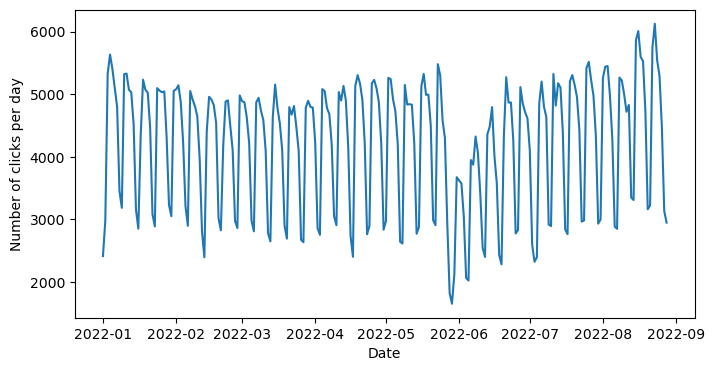

In [22]:
# total clicks
clicks_per_day = item_time.sum(axis=0).reset_index('date').reset_index(drop=True)\
                    .rename(columns={0:'total_clicks'})
clicks_per_day['dayOfWeek'] = clicks_per_day['date'].map(lambda x: x.weekday())

plt.figure(figsize=(8,4))
sns.lineplot(data=clicks_per_day, x='date', y='total_clicks')
plt.xlabel('Date')
plt.ylabel('Number of clicks per day')
plt.show()

# weekly trend?

In [23]:
# select days with low total click
lowest_days_index = []
for i in clicks_per_day.index.tolist()[1:-1]:
    if (clicks_per_day.loc[i,'total_clicks'] < clicks_per_day.loc[i-1,'total_clicks']) &\
    (clicks_per_day.loc[i,'total_clicks'] < clicks_per_day.loc[i+1,'total_clicks'])&\
    (clicks_per_day.loc[i,'total_clicks']<3000):
        lowest_days_index.append(i)
clicks_per_day_low = clicks_per_day.loc[lowest_days_index,]

clicks_per_day_low['dayOfWeek'].value_counts()

# Saturdays and Sundays, more Sundays

dayOfWeek
6    23
5     6
Name: count, dtype: int64

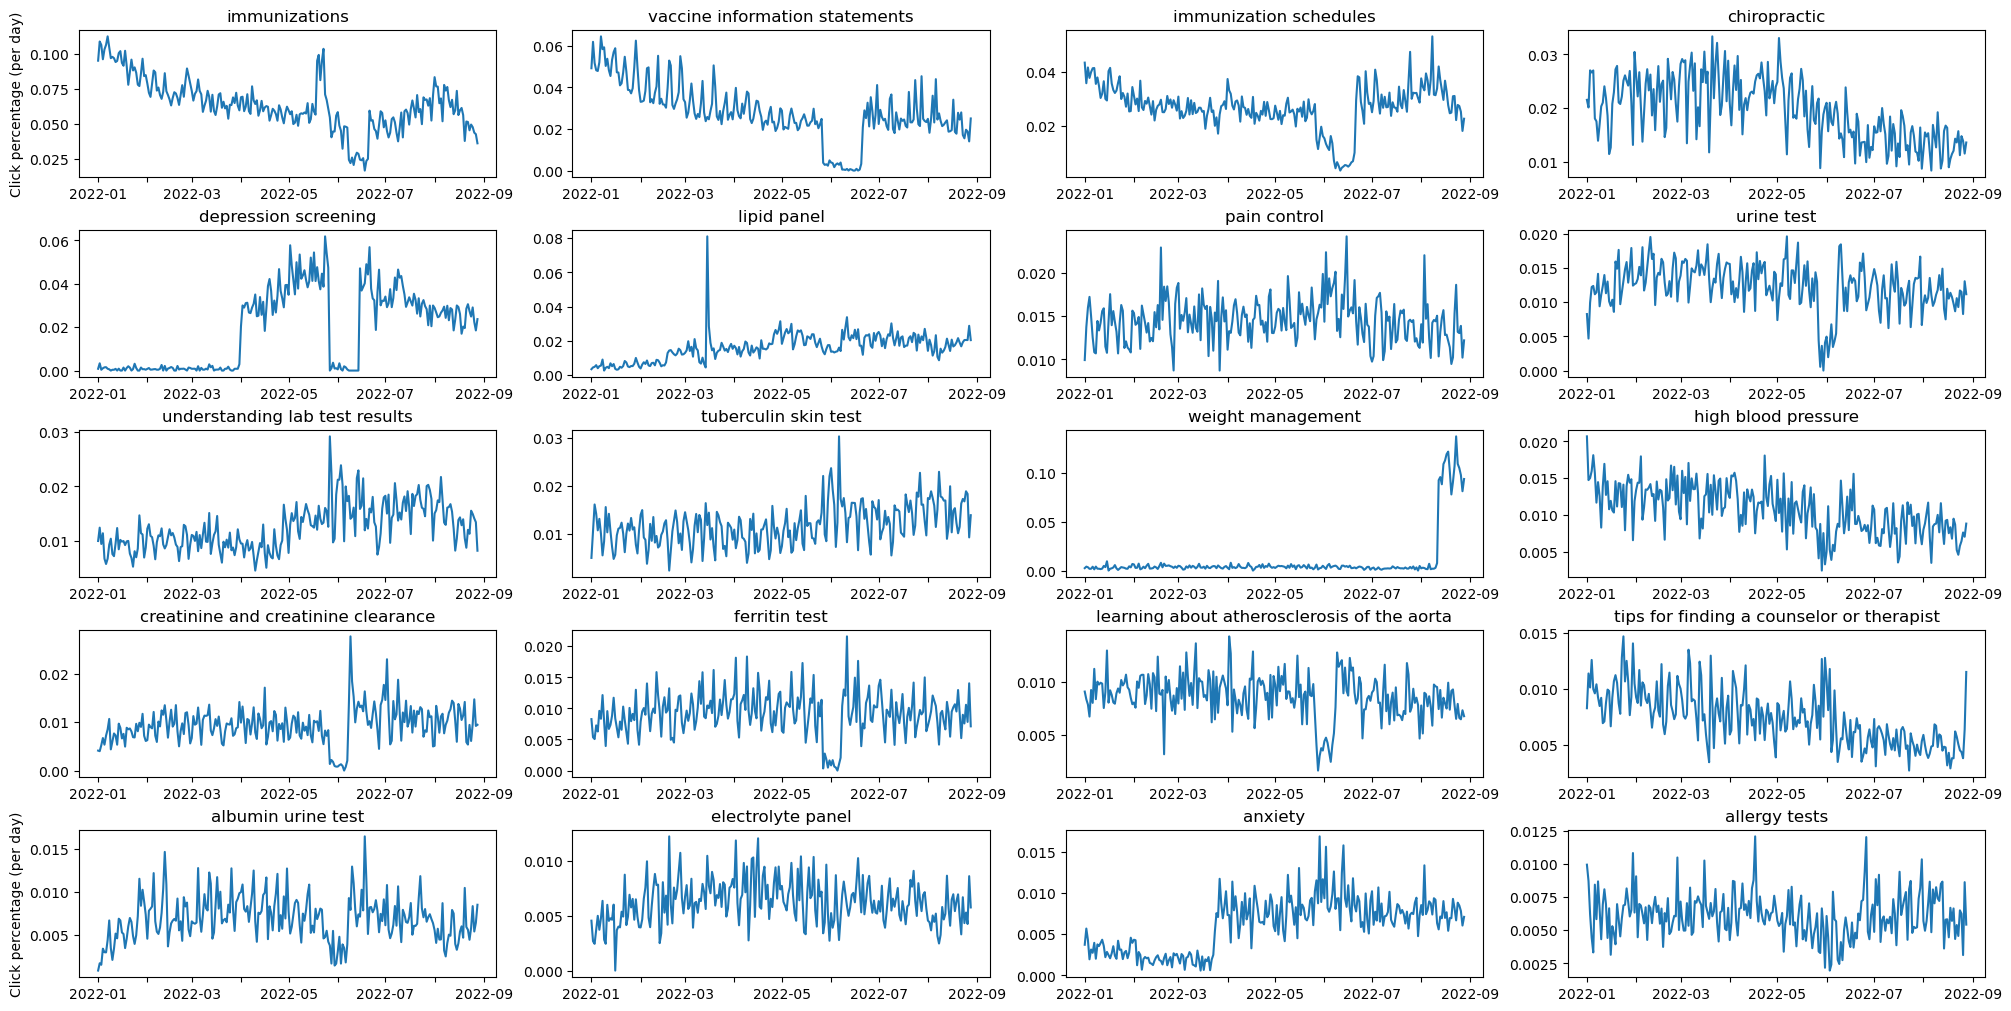

In [36]:
n=20
top_clicked_pages = item_time.sum(axis=1).sort_values(ascending=False).reset_index().head(n)\
                                      .rename(columns={0:'page_clicks'})

def plot_pageClicks_ts(page_name, ax, df=item_time_prop):
    """plot click trend for one page"""
    date_ls = df.transpose().index.get_level_values('date').tolist()
    sns.lineplot(ax=ax, 
                x=date_ls, y=df.transpose()[page_name])
    ax.set_title(page_name)
    ax.set_ylabel(None)
    xtick_labels = ax.get_xticklabels()
    new_labels = [""]*len(xtick_labels)
    new_labels[0:9:2] = xtick_labels[0:9:2]
    ax.set_xticklabels(new_labels)

fig, axes = plt.subplots(5,4, figsize=(20,10))
axes = axes.flatten()
for i in range(20):
    plot_pageClicks_ts(page_name=top_clicked_pages.loc[i,'item_id'], 
                        ax=axes[i])
    if (i==0) or (i==16):
        axes[i].set_ylabel('Click percentage (per day)')

## Time Series Clustering

In [46]:
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import KShape
from tslearn.metrics import cdist_dtw
from tslearn.barycenters import dtw_barycenter_averaging
import numpy as np
import math

In [ ]:
item_time_matrix = item_time_prop

page_click_order = item_time_matrix.sum(axis=1).reset_index().sort_values(0, ascending=False)['item_id']
item_time_matrix_sorted = item_time_matrix.loc[page_click_order]

# filter out pages with too few clicks
data = item_time_matrix_sorted[:math.ceil(item_time_matrix_sorted.shape[0]*0.6)]
print(f'number of pages to cluster: {data.shape[0]}')

scaler = StandardScaler()
data = scaler.fit_transform(data.transpose()).transpose()

# KShape clustering
n_cluster = 20
ks = KShape(n_clusters=n_cluster, n_init=3, random_state=2023).fit(data)

In [ ]:
def plot_ts_clusters(ks:KShape, data, min_sim=11):
    # get cluster labels
    y_pred = ks.predict(data)

    # similarity between cluster centriods by dtw
    sim = cdist_dtw(ks.cluster_centers_)

    # combine similar clusters with dtw-sim < min_sim
    for i in range(ks.n_clusters):
        for j in range(i, ks.n_clusters):
            if sim[i,j] < min_sim:
                y_pred[y_pred==i]=j
    # reorder
    n_cluster = len(np.unique(y_pred))
    mapping = dict(zip(np.unique(y_pred), range(n_cluster)))
    y_pred = np.array([mapping[i] for i in y_pred])

    # plot cluster
    plt.figure(figsize=(6, 2*n_cluster))
    for yi in range(n_cluster):
        n_pages = len(data[y_pred==yi])
        plt.subplot(n_cluster, 1, 1 + yi)
        # for i in data[y_pred==yi]:
            # plt.plot(i, color='gray', alpha=.5)
        plt.plot(data[y_pred==yi][np.argmin(np.sum(data[y_pred==yi], axis=1))], color='gray', alpha=.5)
        plt.plot(data[y_pred==yi][np.argmax(np.sum(data[y_pred==yi], axis=1))], color='gray', alpha=.5)
        plt.plot(dtw_barycenter_averaging(data[y_pred==yi]), "r-")
        plt.xlim(0, data.shape[1])
        plt.ylim(-5, 5)
        plt.title(f'Cluster {yi+1}: {n_pages} items')

    plt.tight_layout()
    plt.show()

In [ ]:
plot_ts_clusters(item_time_prop, data)